In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import datetime
from IPython.display import Markdown
from datetime import datetime
import textwrap

# DNN for forecasting
from keras.models import Sequential
from keras.layers import Dense

In [7]:
df = pd.read_csv('Data Source\AMZN.csv')

In [8]:
# Xem data 
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0.0,0.0
1,2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0.0,0.0
2,2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0.0,0.0
3,2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0.0,0.0
4,2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0.0,0.0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,116.629997,116.870003,114.309998,115.000000,66496700,0.0,0.0
1108,2023-05-26 00:00:00-04:00,116.040001,121.500000,116.019997,120.110001,96779900,0.0,0.0
1109,2023-05-30 00:00:00-04:00,122.370003,122.919998,119.860001,121.660004,64314800,0.0,0.0
1110,2023-05-31 00:00:00-04:00,121.449997,122.040001,119.169998,120.580002,72800800,0.0,0.0


In [9]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = df[['Close']]
df1=df.reset_index()['Close']

In [10]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [12]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
output_features = 1  # We are only predicting the "close" price column

In [15]:
from tensorflow.keras.layers import Dense, Dropout

In [16]:
# 8. Bulit Deep Feedforward Neural Network model
# Define the model
model = Sequential()

# Add a hidden layer
model.add(Dense(128, activation='relu', input_shape=(time_step,)))
Dropout(0.2),

# Add a hidden layer
model.add(Dense(64, activation='relu'))
Dropout(0.2),

# Add a hidden layer
model.add(Dense(32, activation='relu'))
Dropout(0.2),

# Add a dense output layer
model.add(Dense(1))

In [17]:
#compile the model with mean squared error (MSE) as the loss function and Adam optimizer as the optimizer
model.compile(loss='mse', optimizer='adam')

In [18]:
# 9. Fit mô hình với dữ liệu train
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, ytest))

Epoch 1/100
22/22 [==============================] - 2s 12ms/step - loss: 0.0249 - val_loss: 0.0174
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0131
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0102
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0092
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0066
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0059
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 10/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0064
Epoch 11

In [19]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 38ms/step


In [20]:
#11. Chuẩn hóa dữ liệu y_pred, và y_pred_val
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [21]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))
ytest

yval = scaler.inverse_transform(yval.reshape(-1, 1))
yval

array([[113.40000153],
       [115.5       ],
       [118.15000153],
       [116.25      ],
       [115.01000214],
       [114.98999786],
       [116.75      ],
       [115.        ],
       [120.11000061],
       [121.66000366],
       [120.58000183]])

In [22]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 3.8464491055143597
Testing RMSE: 5.851415882782181


In [23]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính toán MAPE
mape = mean_absolute_percentage_error(y_pred, ytest)

print("MAPE:", mape)

MAPE: 0.04228911043466962


In [25]:
from sklearn.metrics import mean_absolute_error

# Tính toán MAE
mae = mean_absolute_error(y_pred, ytest)

print("MAE:", mae)

MAE: 4.766708563181979


In [26]:
# Use the trained model to make predictions for the next 30 days
last_30_days = df['Close'].tail(time_step).values.reshape(1, -1)
predictions = []
for i in range(30):
    prediction = model.predict(last_30_days)[0][0]
    predictions.append(prediction)
    last_30_days = np.append(last_30_days[:,1:], [[prediction]], axis=1)

1/1 [==============================] - 0s 48ms/step


In [27]:
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

In [30]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[11:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        #x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.11067039 0.13317022 0.17996259 0.18157613 0.20712378 0.18856816
 0.18327932 0.16732329 0.19932501 0.20174528 0.19098843 0.19869753
 0.21698424 0.24405569 0.22890647 0.25203371 0.27014116 0.33970235
 0.25436439 0.24351787 0.24289039 0.22442443 0.20819942 0.20255208
 0.21985274 0.22128695 0.23437455 0.20739269 0.19887678 0.17539097
 0.18623748 0.18650639 0.16570976 0.16804044 0.17225356 0.15378753
 0.15342896 0.17825947 0.16795078 0.16615799 0.16947465 0.15450467
 0.14087932 0.15611821 0.17808015 0.18991272 0.22433477 0.2145639
 0.20344848 0.22944429 0.21232289 0.21241254 0.20721337 0.20640664
 0.19923535 0.22621722 0.24190434 0.25346799 0.24557964 0.25938424
 0.23383666 0.24244216 0.24342821 0.22325906 0.20452419 0.24548998
 0.24647603 0.24853773 0.24459358 0.26252172 0.25812928 0.2863661
 0.27964305 0.24701385 0.26861729 0.31200334 0.27283034 0.24235257
 0.25651574 0.25669506 0.25983247 0.27471286 0.27623673 0.28331835
 0.31532007 0.33315855 0.31594756 0.32437373 0.34409

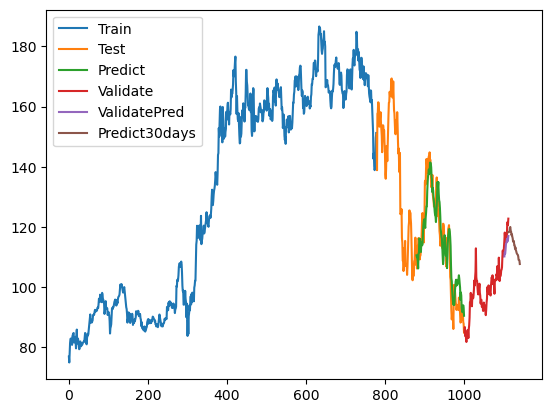

In [31]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()